In [1]:
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [2]:
rep = '              precision    recall  f1-score   support\n\n          NO       0.77      0.99      0.87        96\n         YES       0.94      0.36      0.52        44\n\n    accuracy                           0.79       140\n   macro avg       0.86      0.68      0.70       140\nweighted avg       0.83      0.79      0.76       140\n'
rep = [i for i in rep.split('\n') if len(i) > 1 ]

report = []
for line in rep:
    report.append(line.strip().replace(' ', ' ').split())
    
report[0].insert(0, 'class')

report[-1][0] = report[-1][0] + '_' + report[-1][1]
del report[-1][1]

report[-2][0] = report[-2][0] + '_' + report[-2][1]
del report[-2][1]

report[-3] = [report[-3][0], ' ', ' ', report[-3][1], report[-3][2]]

report.insert(-3, [''] * 5)

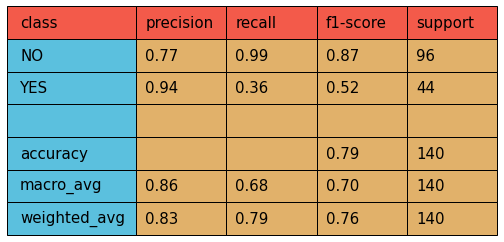

In [4]:
fig,(ax) = plt.subplots(figsize=(8,4), ncols=1)

cols = report[0]
rows = report[1:]

cell_colors = [['#5BC0DE', '#E1B16A', '#E1B16A', '#E1B16A', '#E1B16A']] * (len(report) - 1)
col_colors = ['#F35A4A'] * 5

the_table = ax.table(cellText=rows, colWidths=[0.1, 0.07, 0.07, 0.07, 0.07 ], cellColours = cell_colors, 
                     colLoc = 'left', cellLoc = 'left', colColours = col_colors,
                     colLabels=cols, loc = 'center', edges = 'closed')
the_table.set_fontsize(16)
the_table.scale(4, 4)

ax.axis('tight')
ax.axis('off')
fig.tight_layout()

buf = BytesIO()
fig.savefig(buf, format="png")
data = base64.b64encode(buf.getbuffer()).decode("ascii")

In [254]:
labels = [1, 2, 3, 5, 6, 7]
confusion_matrix = [[50, 0, 0, 0, 0, 0], 
                     [0, 57, 0, 0, 0, 0], 
                     [0, 0, 10, 0, 0, 0], 
                     [0, 0, 0, 7, 0, 0], 
                     [0, 199, 0, 0, 4, 0], 
                     [0, 0, 0, 0, 0, 20]]

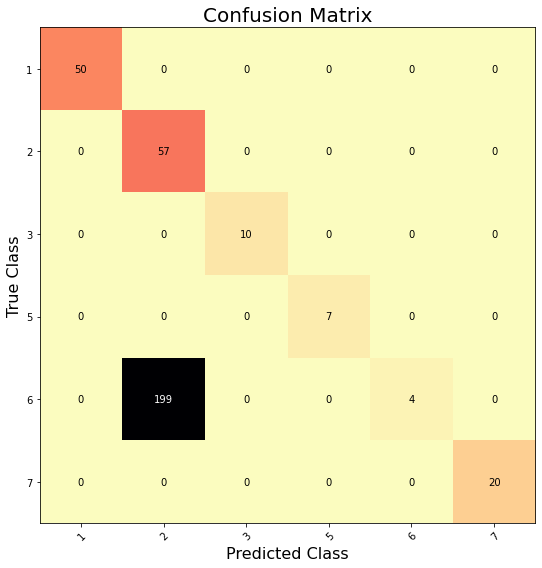

In [255]:
fig, (ax) = plt.subplots(figsize = (8,8), ncols = 1)
im = ax.imshow(confusion_matrix, cmap = 'magma_r')

# We want to show all ticks...
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

max_value, min_value = 99999, 0
for i in range(len(labels)):
    for j in range(len(labels)):
        max_value = min(max_value, confusion_matrix[i][j])
        min_value = max(min_value, confusion_matrix[i][j])
        
th = (max_value + min_value) / 2 
# Loop over data dimensions and create text annotations.
for i in range(len(labels)):
    for j in range(len(labels)):
        text = ax.text(j, i, confusion_matrix[i][j],
                       ha="center", va="center", color= 'w' if confusion_matrix[i][j] > th else 'k')

ax.set_title("Confusion Matrix", fontsize = 20)
plt.xlabel('Predicted Class', fontsize = 16)
plt.ylabel('True Class', fontsize = 16)
fig.tight_layout()

buf = BytesIO()
fig.savefig(buf, format="png")
data = base64.b64encode(buf.getbuffer()).decode("utf-8")

In [249]:
print(data)

iVBORw0KGgoAAAANSUhEUgAAAkAAAAJACAYAAABlmtk2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8GearUAAAgAElEQVR4nO3deXRU9f3/8ddkQZawJwFCkE0hJCwREkFFxIU1YGWXVSqLVnvQqohfpaCU+qUIKF+1Sn5SUGSJSwVBwiKLIEhwhICIgGjYEpYkQCARQjK5vz/8Mb/mG0UlN9yZfJ6Pc3oOk5nc++bdsT57ZzJxWZZlCQAAwCABTg8AAABwrRFAAADAOAQQAAAwDgEEAACMQwABAADjEEAAAMA4BBAAADAOAQQAAIxDAAEAAOMQQAAAwDgEEICrduHCBfXu3VvVq1fXgAEDrvo4CxcuVNeuXW2czBk9evTQ22+/7fQYAH4DAggwwKJFixQXF6eQkBDVq1dPPXr00Oeff17q437wwQc6efKksrOz9f7771/1cYYOHao1a9aUep7/bePGjXK5XOrTp0+xr+/atUsul0udO3f+Tcd5/vnnNWzYsF99XHJysh544IGrGRXANUYAAeXcrFmz9Pjjj+vZZ5/VyZMndeTIET3yyCNatmxZqY99+PBhNWvWTEFBQTZMWjbCwsL0xRdfKDs72/u1t99+W82aNbPtHJZlqaioyLbjASh7BBBQjuXk5GjSpEl6/fXX1bdvX1WpUkXBwcHq3bu3XnrpJUlSfn6+Hn/8cUVERCgiIkKPP/648vPzJf10BSUyMlIzZ85UeHi46tWrp3nz5kmSJk+erClTpigpKUkhISGaO3duiSslhw4dksvlUmFhoSRp/vz5atKkiapWrarGjRtr4cKF3q937NjR+31bt25VfHy8qlevrvj4eG3dutV7X+fOnfXXv/5Vt912m6pWraquXbsqKyvrF3dQoUIF